
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

This is a classification problem since the target variable takes only a set of values
Because we are only dealing with 2 Discrete outcomes and they are Students who need an early intervention.Students who do not need an early intervention.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [134]:
# Import libraries
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Read student data
data=pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [137]:
# Calculate number of students
n_students = len(data.index)

In [138]:
# Calculate number of features
n_features=len(data.columns)

In [139]:
# Calculate passing students
n_passed=len(data[data.passed=="yes"])

In [140]:
# Calculate failing students
n_failed=len(data[data.passed=="no"])

In [141]:
# Calculate graduation rate
grad_rate=round((n_passed/n_students)*100)

In [142]:
# Print the results
print("The total number of students, n_students is :",n_students)
print("The total number of features for each student, n_features is :",n_features)
print("The number of those students who passed, n_passed is :",n_passed)
print("The number of those students who failed, n_failed is :",n_failed)
print("The graduation rate of the class, grad_rate, in percent (%) is",grad_rate)

The total number of students, n_students is : 395
The total number of features for each student, n_features is : 31
The number of those students who passed, n_passed is : 265
The number of those students who failed, n_failed is : 130
The graduation rate of the class, grad_rate, in percent (%) is 67


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [143]:
# Extract feature columns

In [144]:
data_features = list(data.columns[:-1])

In [145]:
# Extract target column 'passed'

In [146]:
data_target = data.columns[-1]

In [147]:
# Separate the data into feature data and target data (X and y, respectively)

In [148]:
X = data[data_features]
y = data[data_target]

In [149]:
dtypes=X.dtypes.to_frame('Data type')
dtypes.reset_index(level=0, inplace=True)
dtypes.rename(columns = {'index':'Feature'}, inplace = True)
dtypes[dtypes['Data type'] == 'object']

,Feature,Data type
0,school,object
1,sex,object
3,address,object
4,famsize,object
5,Pstatus,object
8,Mjob,object
9,Fjob,object
10,reason,object
11,guardian,object
15,schoolsup,object


### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [150]:
X=pd.get_dummies(X)
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [151]:
X = pd.get_dummies(X)
X.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [152]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=95)

In [153]:
# Show the results of the split
print(" shape of x train",X_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",X_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (300, 56)
 shape of y train (300,)
 shape of x test (95, 56)
 shape of y test (95,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

In [154]:
#explaination

# 1. Logistic Regression
Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data.

Strengths:

◉ Outputs have a nice probabilistic interpretation

◉ the algorithm can be regularized to avoid overfitting.

◉ Logistic models can be updated easily with new data using stochastic gradient descent.

Weaknesses:

◉ Logistic regression tends to underperform when there are multiple or non-linear decision boundaries.

◉ They are not flexible enough to naturally capture more complex relationships.

# 2. K-NN
K- Nearest Neighbors or also known as K-NN belong to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. The K-NN algorithm is a robust classifier which is often used as a benchmark for more complex classifiers such as Artificial Neural Network (ANN) or Support vector machine (SVM).

Strengths :

◉ Low training times

◉ Memory based reasoning

◉ Simplest and yet effective

◉ Ease to interpret output

◉ Calculation time

Weakness :

◉ Results may change over time as the algorithim is query based

◉ It is instance-based and lazy learning. It is sensitive to the local structure of the data

◉ Before training KNN we have to make a decision concerning the number of the nearest neighbours has to be made



# 3.Random Forest

The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.

General applications of Random Forest are Banking Industry, Healthcare and Medicine, Stock Market, E-Commerce.

Strengths

◉ It reduces overfitting in decision trees and helps to improve the accuracy

◉ It is flexible to both classification and regression problems

◉ It works well with both categorical and continuous values

◉ It automates missing values present in the data

weakness:

◉ It requires much computational power as well as resources as it builds numerous trees to combine their outputs.

◉ It also requires much time for training as it combines a lot of decision trees to determine the class.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [155]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [156]:
# fit model-1  on traning data 
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)

C:\Users\The.Maqtron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
# predict on the test data 
y_pred=logit_model.predict(X_test)

In [158]:
# calculate the accuracy score

In [159]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.7157894736842105


In [160]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [161]:
accuracy_values=[]
neighbors =np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy_values.append(acc)    

Text(0, 0.5, 'accuracy')

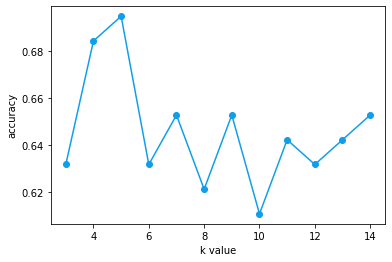

In [162]:
plt.plot(neighbors,acc_values,'o-', color='#109eeb')
plt.xlabel('k value')
plt.ylabel('accuracy')


In [163]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.6947368421052632


In [167]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy
randomfor=RandomForestClassifier()
randomfor.fit(X_train,y_train)
y_pred=randomfor.predict(X_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.6421052631578947
Precision is: 0.603359173126615
Recall is : 0.5380952380952381
f1 score is: 0.4971980074719801


# Summary:
Out of the above 3 Models LogisticRegression Model shown a much better performance than the other two Models. So we can give more preference to LogisticRegression for developing an efficient classifier model for our data.